In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [96]:
df= pd.read_csv('/content/spam.csv', delimiter= ',',encoding='latin-1')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [98]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [99]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [100]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [101]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


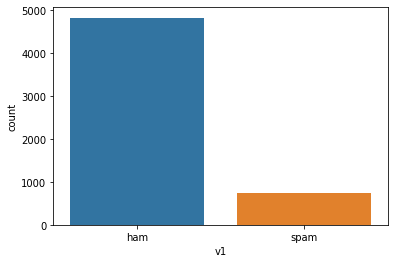

In [102]:
sns.countplot(df.v1)

In [103]:
#df=pd.get_dummies('v1', drop_first=True)

In [104]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
y=pd.get_dummies(df['v1'], drop_first=True)

In [106]:
X= df['v2']

In [107]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.15)

In [108]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(4736,)
(836,)
(4736, 1)
(836, 1)


In [109]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [110]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [111]:
#from keras_preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.sequence import pad_sequences

In [112]:
#from keras.utils import pad_sequences

In [115]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)


In [119]:
sequences= pad_sequences(sequences,maxlen=max_len)

In [120]:
sequences

array([[  0,   0,   0, ..., 363,  46,   3],
       [  0,   0,   0, ...,  15,  18,   5],
       [  0,   0,   0, ..., 443, 613, 483],
       ...,
       [  0,   0,   0, ..., 689,  79,  48],
       [  0,   0,   0, ...,   3,  54, 552],
       [  0,   0,   0, ...,  28,  74, 215]], dtype=int32)

In [121]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [122]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [124]:
model.fit(sequences,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 10s 332ms/step - loss: 0.0409 - accuracy: 0.9884 - val_loss: 0.0610 - val_accuracy: 0.9810
Epoch 2/10
30/30 [==============================] - 9s 286ms/step - loss: 0.0309 - accuracy: 0.9913 - val_loss: 0.0596 - val_accuracy: 0.9852


In [125]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [126]:
accr = model.evaluate(test_sequences_matrix,Y_test)


27/27 [==============================] - 1s 44ms/step - loss: 0.0597 - accuracy: 0.9856


In [127]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.060
  Accuracy: 0.986


In [132]:
test_sequences = tok.texts_to_sequences("Ffffffffff. Alright no way I can meet up with you sooner?")
test_sequences_matrix =pad_sequences(test_sequences,maxlen=max_len)

prediction = model.predict(test_sequences_matrix)
print(prediction)
if (prediction < 0).any() :
    print("ok") 
else:    
    print("Not OK")

2/2 [==============================] - 0s 40ms/step
[[0.00515637]
 [0.00515637]
 [0.00515637]
 [0.00515637]
 [0.00515637]
 [0.00515637]
 [0.00515637]
 [0.00515637]
 [0.00515637]
 [0.00515637]
 [0.00427796]
 [0.00427796]
 [0.00687144]
 [0.00427796]
 [0.00262863]
 [0.00130388]
 [0.00857032]
 [0.00427796]
 [0.01693791]
 [0.00427796]
 [0.00142463]
 [0.0063416 ]
 [0.00427796]
 [0.00389132]
 [0.00687144]
 [0.00157121]
 [0.00427796]
 [0.00130388]
 [0.00427796]
 [0.00969978]
 [0.00687143]
 [0.00142463]
 [0.00427796]
 [0.00875251]
 [0.0041907 ]
 [0.0041907 ]
 [0.01693791]
 [0.00427796]
 [0.00328613]
 [0.00459859]
 [0.00427796]
 [0.00389132]
 [0.00130388]
 [0.01693791]
 [0.00427796]
 [0.00427796]
 [0.00157121]
 [0.0063416 ]
 [0.00328613]
 [0.00427796]
 [0.00427264]
 [0.0063416 ]
 [0.0063416 ]
 [0.00142463]
 [0.0041907 ]
 [0.00262863]
 [0.00427796]]
Not OK
